# Exploratory Data Analysis (EDA) on Prepared NCAA Women's Basketball Dataset

# Step 1: Import required libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load your prepared dataset

In [2]:
final_df = pd.read_csv('prepared_ncaa_wbb_data.csv')

# Step 2: Instant Reports (Summary statistics and overview)


In [3]:
print("\nSummary Statistics:")
print(final_df.describe(include='all'))

print("\nMissing Values Check:")
print(final_df.isnull().sum())



Summary Statistics:
       division year_clean  total_inches  state_grouped position_grouped
count     13766      13766  13766.000000          13766            13766
unique        3          7           NaN             42                4
top         III   freshman           NaN  international            guard
freq       5208       3906           NaN           1067             9086
mean        NaN        NaN     69.293331            NaN              NaN
std         NaN        NaN      3.195569            NaN              NaN
min         NaN        NaN     58.000000            NaN              NaN
25%         NaN        NaN     67.000000            NaN              NaN
50%         NaN        NaN     69.000000            NaN              NaN
75%         NaN        NaN     72.000000            NaN              NaN
max         NaN        NaN     81.000000            NaN              NaN

Missing Values Check:
division            0
year_clean          0
total_inches        0
state_grouped 

# Step 3: Descriptive Analysis


## Univariate Analysis - Categorical Variables


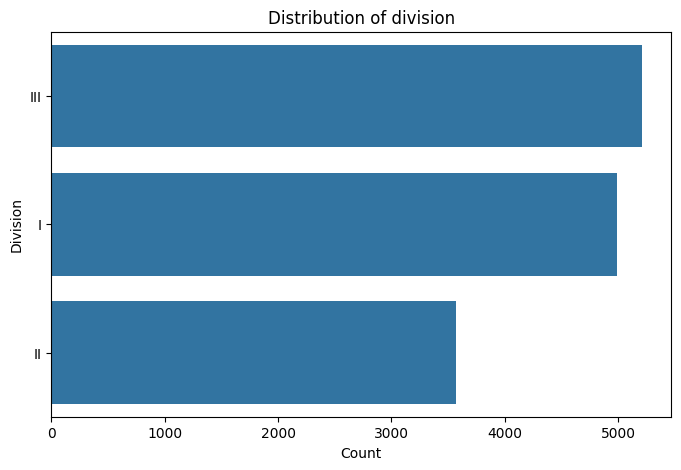

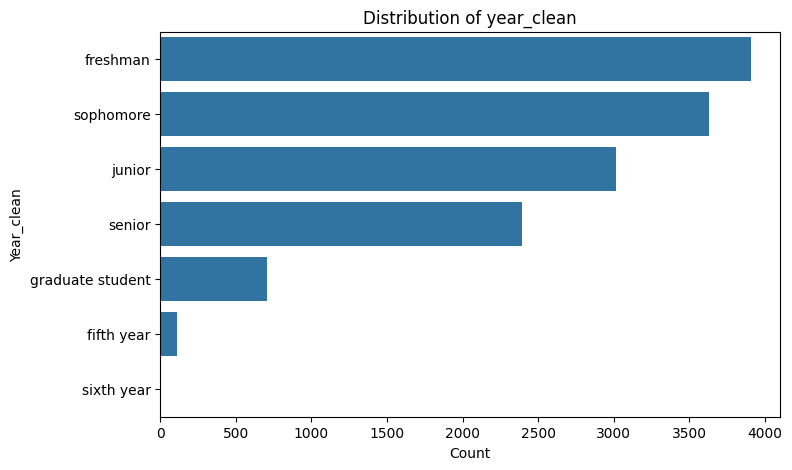

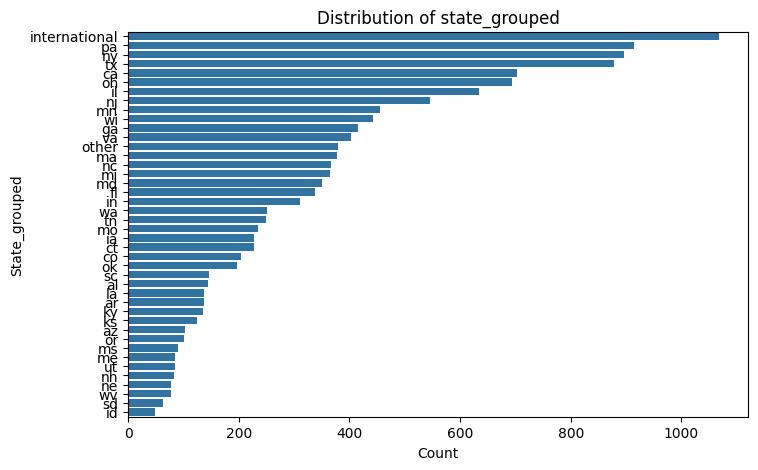

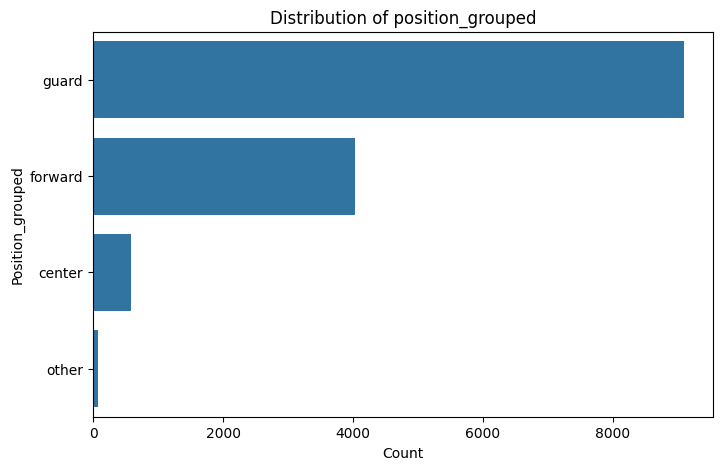

In [4]:
categorical_cols = ['division', 'year_clean', 'state_grouped', 'position_grouped']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=final_df, order=final_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col.capitalize())
    plt.show()


## Univariate Analysis - Numeric Variables

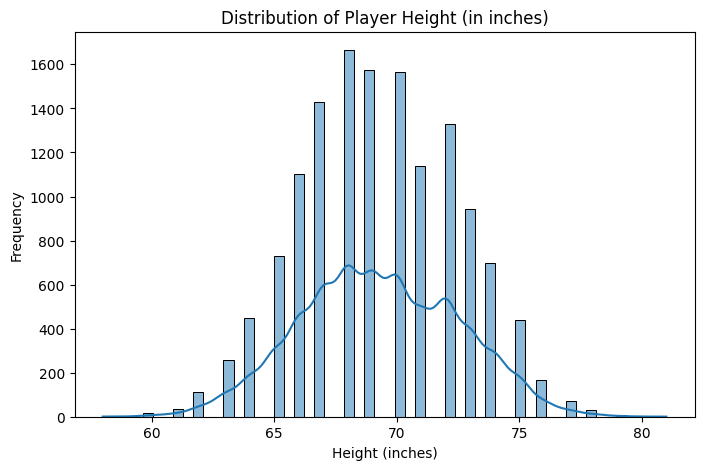

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['total_inches'], kde=True)
plt.title("Distribution of Player Height (in inches)")
plt.xlabel("Height (inches)")
plt.ylabel("Frequency")
plt.show()


# Step 4: Correlation and Relationship Analysis


## Encode categorical variables for correlation analysis


In [6]:
encoded_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)


## Correlation Matrix

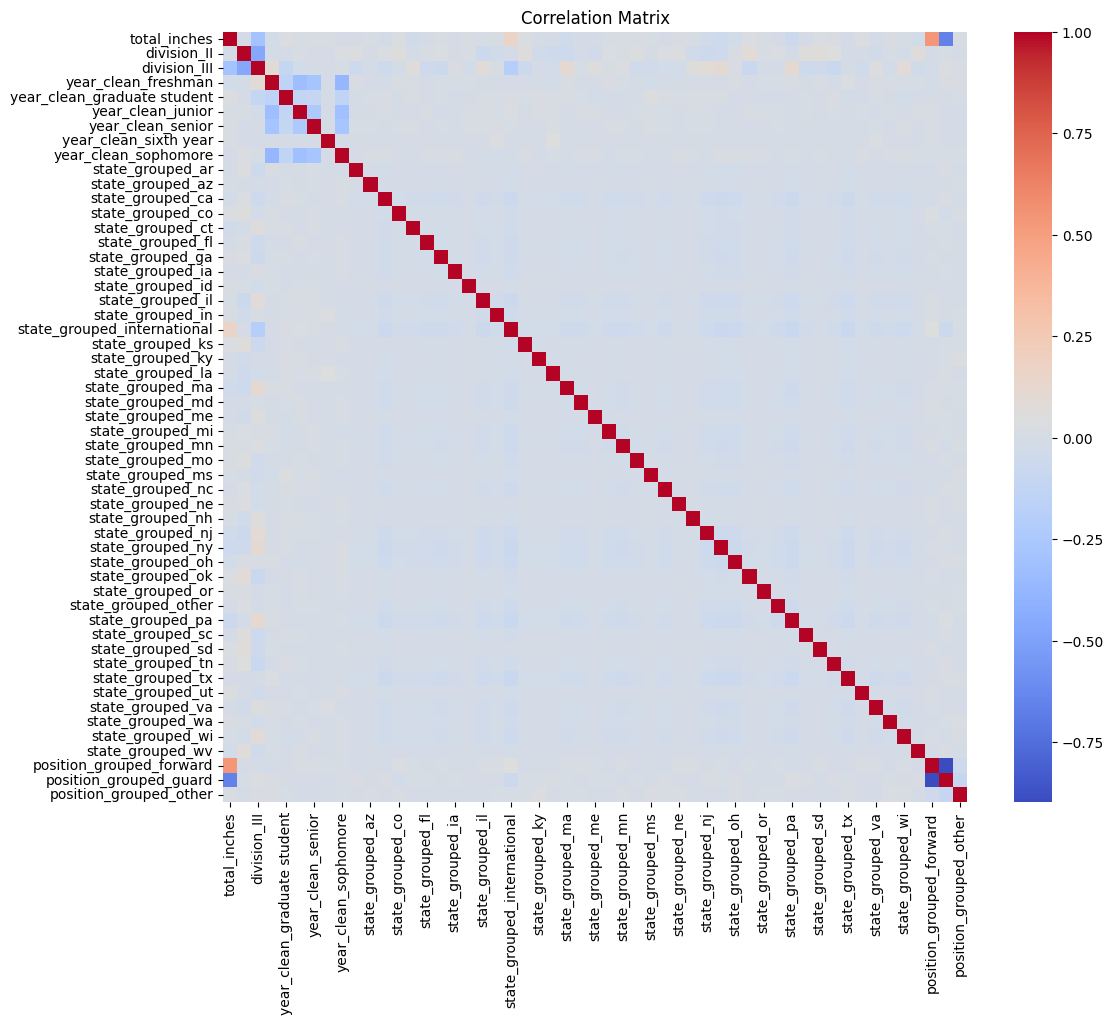

In [7]:
corr_matrix = encoded_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


## Scatter Matrix for numeric relationships

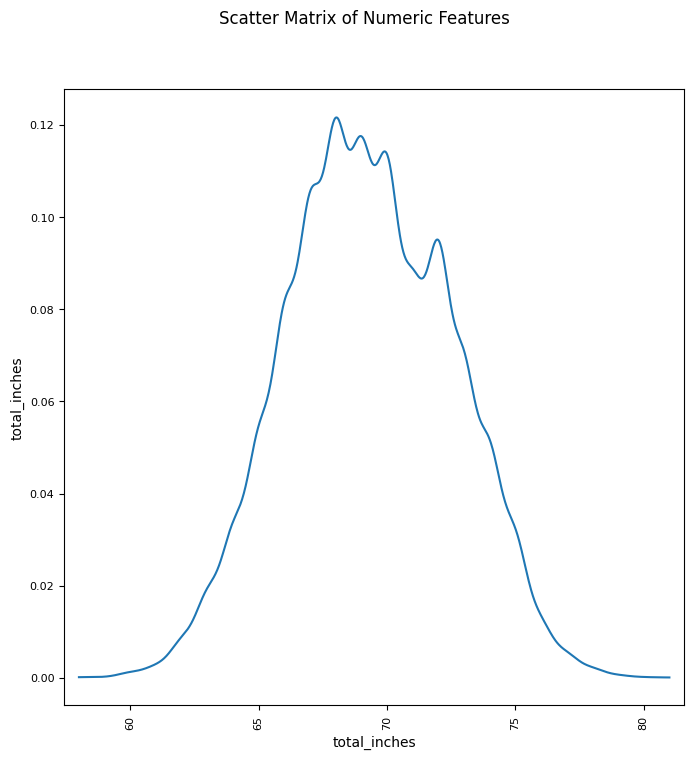

In [8]:
scatter_matrix(encoded_df[['total_inches']], figsize=(8, 8), diagonal='kde')
plt.suptitle("Scatter Matrix of Numeric Features")
plt.show()
